In [41]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

In [42]:
image=cv2.imread('coin_img.jpeg')

In [43]:
image_blur=cv2.medianBlur(image,25)

In [44]:
image_blur_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [45]:
image_res,image_thresh=cv2.threshold(image_blur_gray,240,255,cv2.THRESH_BINARY_INV)

In [46]:
kernal=np.ones((3,3),np.uint8)

In [47]:
opening=cv2.morphologyEx(image_thresh,cv2.MORPH_OPEN,kernal)

In [48]:
dist_transform=cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret,last_image=cv2.threshold(dist_transform,0.3*dist_transform.max(),255,0)
last_image=np.uint8(last_image)

In [49]:
cnt=cv2.findContours(last_image.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnt=imutils.grab_contours(cnt)

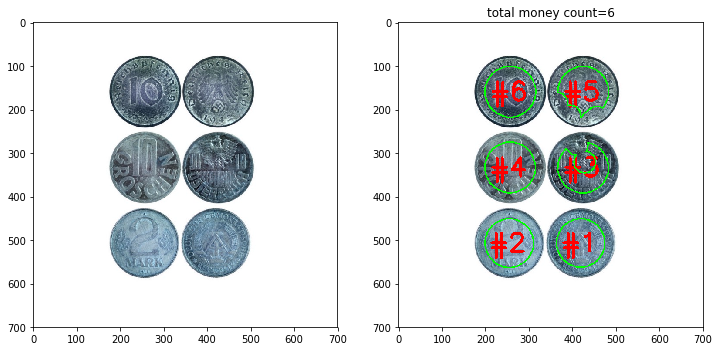

In [50]:
def display(img,count,cmap="gray"):
    f_image=cv2.imread('coin_img.jpeg')
    f,axis=plt.subplots(1,2,figsize=(12,6))
    axis[0].imshow(f_image,cmap="gray")
    axis[1].imshow(img,cmap="gray")
    axis[1].set_title("total money count={}".format(count))

for (i,c) in enumerate(cnt):
    ((x,y),_)=cv2.minEnclosingCircle(c)
    cv2.putText(image,"#{}".format(i+1),
                (int(x)-45,int(y)+20),
                cv2.FONT_HERSHEY_SIMPLEX,2,(255,0,0),5)
    cv2.drawContours(image,[c],-1,(0,255,0),2)
    
display(image,len(cnt))